In [1]:
import pandas as pd

# Load your list of 17,000 words from a CSV file or any other data source
# Replace 'input_data.csv' with your file path.
df = pd.read_csv('sdf.csv', header=None, names=['Words'])

# Determine the size of the square data field
n = int(len(df) ** 0.5)
n = n + 1 if n * n < len(df) else n

# Create a square data field DataFrame filled with empty strings
square_df = pd.DataFrame([''] * (n * n), columns=['Words'])

# Fill the square data field with your words
for i, word in enumerate(df['Words']):
    row = i // n
    col = i % n
    square_df.at[row, col] = word

# Save the square data field to a CSV file
square_df.to_csv('square_data.csv', index=False)


## Fixed Cloud

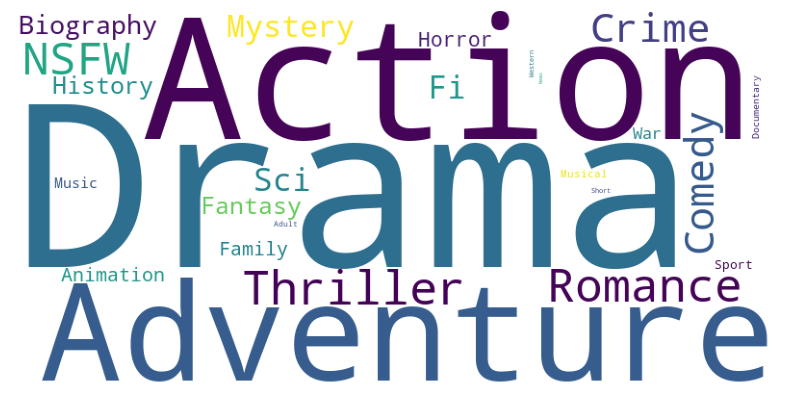

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV data
# Replace 'input_data.csv' with the path to your CSV file containing the words.
df = pd.read_csv('sdf.csv')

# Combine all the words into a single string
# text = ' '.join(df['Words'])
text = ' '.join(df['Words'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_width=1, contour_color='black', collocations=False).generate(text)

# Display the word cloud using matplotlib with 'antialiased' interpolation
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='antialiased')  # Specify the interpolation method here
plt.axis('off')
plt.show()


## Changing Cloud

IntSlider(value=0, description='Random Seed', max=10000)

Button(description='Generate Word Cloud', style=ButtonStyle())

Output()

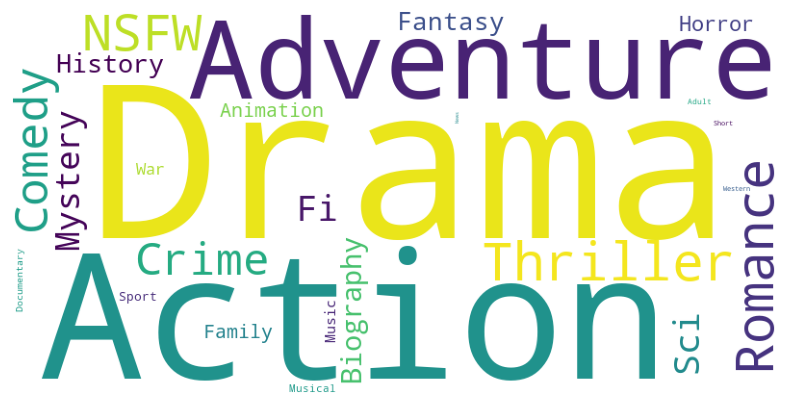

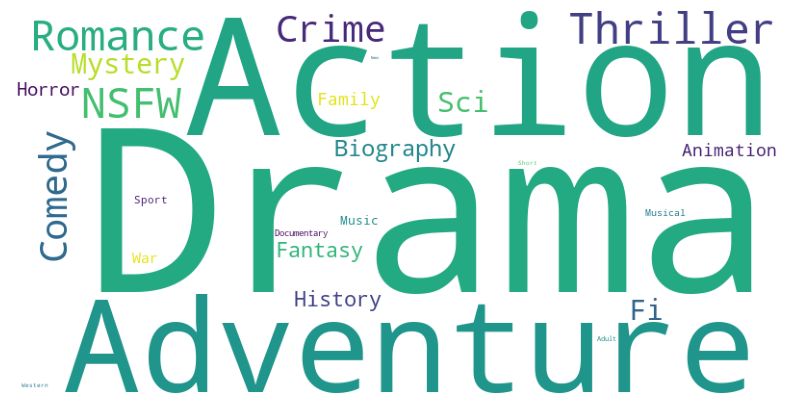

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random  # Import the random module
from ipywidgets import interact, widgets
from IPython.display import display

# Load the CSV data
# Replace 'input_data.csv' with the path to your CSV file containing the words.
df = pd.read_csv('sdf.csv')

# Convert all values in the 'Words' column to strings and then join them
# text = ' '.join(df['Words'].astype(str))
words = df['Words'].astype(str).tolist()
def generate_wordcloud(random_seed):
    random.shuffle(words)
    text = ' '.join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white', contour_width=1, contour_color='black', collocations=False, random_state=random_seed).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='antialiased')
    plt.axis('off')
    plt.show()

# Create an interactive widget for the random seed
seed_slider = widgets.IntSlider(value=0, min=0, max=10000, step=1, description='Random Seed')

# Create an interactive button
generate_button = widgets.Button(description='Generate Word Cloud')

# Define a function to handle button click
def on_generate_button_click(b):
    generate_wordcloud(seed_slider.value)

generate_button.on_click(on_generate_button_click)

# Create an interactive output widget to display the word cloud
output = widgets.Output()

# Display the widgets
display(seed_slider, generate_button, output)

# Initially generate and display the word cloud with the default seed
with output:
    generate_wordcloud(seed_slider.value)

# # Create a random seed
# random_seed = random.randint(0, 10000)

# # Create a WordCloud object with the random seed
# wordcloud = WordCloud(width=800, height=400, background_color='white', contour_width=1, contour_color='black', collocations=False, random_state=random_seed).generate(text)

# # Display the word cloud using matplotlib with 'antialiased' interpolation
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='antialiased')  # Specify the interpolation method here
# plt.axis('off')
# plt.show()

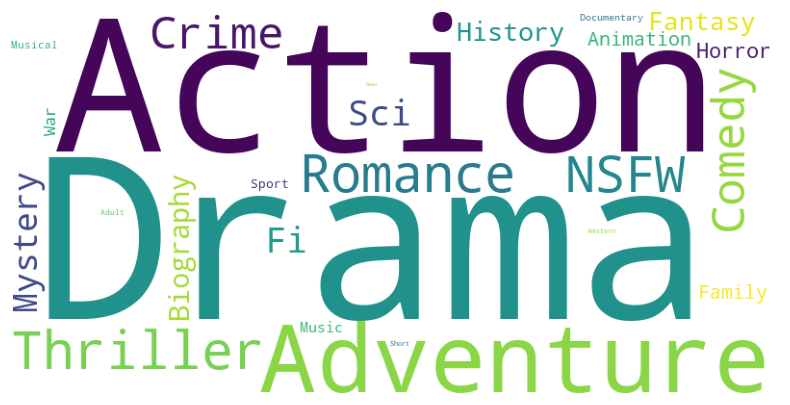

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from ipywidgets import widgets
from IPython.display import display, clear_output

# Load the CSV data
# Replace 'input_data.csv' with the path to your CSV file containing the words.
df = pd.read_csv('sdf.csv')

# Convert all values in the 'Words' column to strings
words = df['Words'].astype(str).tolist()

# Function to generate and display the word cloud
def generate_wordcloud(b):
    random.shuffle(words)
    text = ' '.join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white', contour_width=1, contour_color='black', collocations=False, random_state=None).generate(text)
    
    # Clear the previous output and display the new word cloud
    clear_output()
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='antialiased')
    plt.axis('off')
    plt.show()

# Create an interactive button
generate_button = widgets.Button(description='Generate Word Cloud')

# Define a function to handle button click
generate_button.on_click(generate_wordcloud)

# Display the button
display(generate_button)

# Initially generate and display the word cloud
generate_wordcloud(None)

## Both Color and words changing

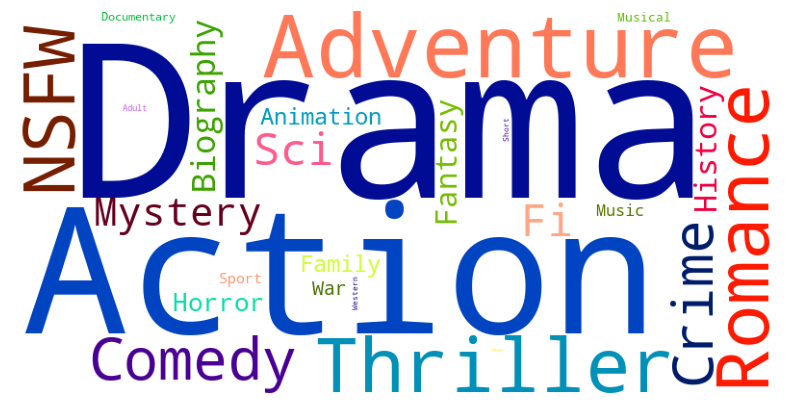

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from wordcloud import get_single_color_func

# Load the CSV data
# Replace 'input_data.csv' with the path to your CSV file containing the words.
df = pd.read_csv('sdf.csv')

# Convert all values in the 'Words' column to strings
words = df['Words'].astype(str).tolist()

# Shuffle the list of words to get a random order
random.shuffle(words)

# Join the shuffled words into a single string
text = ' '.join(words)

# Create a random seed
random_seed = random.randint(0, 1000)

# Define a custom color function that returns random colors
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({}, 100%, {}%)".format(random.randint(0, 360), random.randint(20, 80))

# Create a WordCloud object with the custom color function and random seed
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_width=1, contour_color='black', collocations=False, random_state=random_seed, color_func=random_color_func).generate(text)

# Display the word cloud using matplotlib with 'antialiased' interpolation
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='antialiased')  # Specify the interpolation method here
plt.axis('off')
plt.show()
